In [87]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from IPython.display import HTML

In [61]:
sheets = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
data = pd.read_excel('earnings_combined.xlsx', sheet_name='Mon')

data

,Company,Period Ending,Consensus EPS,Year Ago Actual EPS,ticker,ten day return,one month return,one year return
0,5N Plus Inc (VNP),Q3 9/1/24,0.06,0.02,VNP,NaN,NaN,NaN
1,8X8 Inc (EGHT),Q2 9/1/24,0.08,0.14,EGHT,0.131707,0.183673,-0.226667
2,Abb India LTD (),Q4 9/1/24,23.31,15.98,NaN,NaN,NaN,NaN
3,Abcellera Biologics Inc (ABCL),Q3 9/1/24,-0.15,-0.10,ABCL,0.017606,0.146825,-0.354190
4,Ac Immune Sa (ACIU),Q3 9/1/24,-0.20,-0.18,ACIU,-0.054662,-0.209677,0.092937
...,...,...,...,...,...,...,...,...
296,Wynn Resorts LTD (WYNN),Q3 9/1/24,1.01,0.99,WYNN,-0.037726,0.136526,0.016619
297,York Water Co (YORW),Q3 9/1/24,0.41,0.53,YORW,-0.047568,-0.061689,-0.048405
298,Yum China Holdings Inc (YUMC),Q3 9/1/24,0.68,0.59,YUMC,0.107520,0.239672,0.091550
299,Zentalis Pharmaceuticals Inc (ZNTL),Q3 9/1/24,-0.91,-0.79,ZNTL,0.195513,-0.072139,-0.701122


### SMA 10, SMA 20, SMA 50

In [159]:
# Function to generate a plot and return it as a base64-encoded HTML image
def plot_to_html(date, data, sma10, sma20, sma50):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(date, data, label='Close price')
    ax.plot(date, sma10, label='sma_10')
    ax.plot(date, sma20, label='sma_20')
    ax.plot(date, sma50, label='sma_50')
    ax.legend()
    ax.set_title('close price and sma')
    
    buf = BytesIO()
    plt.savefig(buf, format="png")
    plt.close(fig)
    buf.seek(0)
    
    # Encode the image in base64
    img_base64 = base64.b64encode(buf.getvalue()).decode('utf-8')
    
    # Create an HTML image tag
    return f'<img src="data:image/png;base64,{img_base64}" />'

In [161]:
window_size = 10
sma_10_record = []
last_record = []
image_lst = []

for ticker in data.ticker:

    # No ticker recorded
    if pd.isna(ticker):
        sma_10_record.append(None)
        last_record.append(None)
        image_lst.append(None)
        continue
    
    # Get historical data
    comp = yf.Ticker(ticker)
    comp_data = comp.history(period="1y")

    # Data is empty or the length is not long enough
    if comp_data.empty and len(comp_data.Close) < 200:
        
        sma_10_record.append(None)
        last_record.append(None)
        image_lst.append(None)
        continue
        
    else:
            
        # Compute the 10-day simple moving average
        sma_values = comp_data['Close'].rolling(window=window_size).mean().values
        
        # Record if the historical prices are below or above the sma_10
        record = []
        # Record if the sma line cross the asset price
        switch = False
        for i in range(window_size-1, len(comp_data)):
            if not switch and comp_data.Close[i] > sma_values[i]:
                record.append('above')
                switch = True
            elif switch and comp_data.Close[i] < sma_values[i]:
                record.append('below')
                switch = False
        sma_10_record.append(record[-1])

        # Record if the current price is below or above the sma_10
        if comp_data.Close[-1] > sma_values[-1]:
            last_record.append('above')
        elif comp_data.Close[-1] < sma_values[-1]:
            last_record.append('below')
        else:
            last_record.append('same')

        # Compute the 20-day simple moving average
        sma_20_values = comp_data['Close'].rolling(window=20).mean().values
        # Compute the 10-day simple moving average
        sma_50_values = comp_data['Close'].rolling(window=50).mean().values
        # plot
        image_lst.append(plot_to_html(comp_data.index, comp_data.Close, sma_values, sma_20_values, sma_50_values))

VNP: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not switch and comp_data.Close[i] > sma_values[i]:
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif switch and comp_da

AKT.A: No data found, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not switch and comp_data.Close[i] > sma_values[i]:
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif switch and comp_da

BRK.A: No data found, symbol may be delisted
BRK.B: No data found, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not switch and comp_data.Close[i] > sma_values[i]:
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif switch and comp_da

BCOV: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not switch and comp_data.Close[i] > sma_values[i]:
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif switch and comp_da

CJT: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not switch and comp_data.Close[i] > sma_values[i]:
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif switch and comp_da

CVO: No data found for this date range, symbol may be delisted
CRD.B: No data found, symbol may be delisted
CRD.A: No data found, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not switch and comp_data.Close[i] > sma_values[i]:
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif switch and comp_da

DII.B: No data found, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not switch and comp_data.Close[i] > sma_values[i]:
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif switch and comp_da

MPCT.U: No data found, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not switch and comp_data.Close[i] > sma_values[i]:
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif switch and comp_da

EDIT: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not switch and comp_data.Close[i] > sma_values[i]:
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif switch and comp_da

HCKT: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not switch and comp_data.Close[i] > sma_values[i]:
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif switch and comp_da

MKP: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not switch and comp_data.Close[i] > sma_values[i]:
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif switch and comp_da

ONC: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not switch and comp_data.Close[i] > sma_values[i]:
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif switch and comp_da

POU: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not switch and comp_data.Close[i] > sma_values[i]:
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif switch and comp_da

RHP: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not switch and comp_data.Close[i] > sma_values[i]:
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif switch and comp_da

SLAB: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not switch and comp_data.Close[i] > sma_values[i]:
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif switch and comp_da

TIH: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not switch and comp_data.Close[i] > sma_values[i]:
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif switch and comp_da

WJX: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not switch and comp_data.Close[i] > sma_values[i]:
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif switch and comp_da

ZNTL: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not switch and comp_data.Close[i] > sma_values[i]:
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/1003276142.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif switch and comp_da

In [163]:
data['trend'] = sma_10_record
data['current price'] = last_record
data['plot'] = image_lst
data

,Company,Period Ending,Consensus EPS,Year Ago Actual EPS,ticker,ten day return,one month return,one year return,trend,current price,plot,history RSI,current RSI
0,5N Plus Inc (VNP),Q3 9/1/24,0.06,0.02,VNP,NaN,NaN,NaN,None,None,None,None,NaN
1,8X8 Inc (EGHT),Q2 9/1/24,0.08,0.14,EGHT,0.131707,0.183673,-0.226667,above,above,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",89.872853
2,Abb India LTD (),Q4 9/1/24,23.31,15.98,NaN,NaN,NaN,NaN,None,None,None,None,NaN
3,Abcellera Biologics Inc (ABCL),Q3 9/1/24,-0.15,-0.10,ABCL,0.017606,0.146825,-0.354190,below,below,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",43.179151
4,Ac Immune Sa (ACIU),Q3 9/1/24,-0.20,-0.18,ACIU,-0.054662,-0.209677,0.092937,above,above,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",55.564301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,Wynn Resorts LTD (WYNN),Q3 9/1/24,1.01,0.99,WYNN,-0.037726,0.136526,0.016619,below,below,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",22.742525
297,York Water Co (YORW),Q3 9/1/24,0.41,0.53,YORW,-0.047568,-0.061689,-0.048405,above,above,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",46.153007
298,Yum China Holdings Inc (YUMC),Q3 9/1/24,0.68,0.59,YUMC,0.107520,0.239672,0.091550,above,above,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",85.722479
299,Zentalis Pharmaceuticals Inc (ZNTL),Q3 9/1/24,-0.91,-0.79,ZNTL,0.195513,-0.072139,-0.701122,None,None,None,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",67.580051



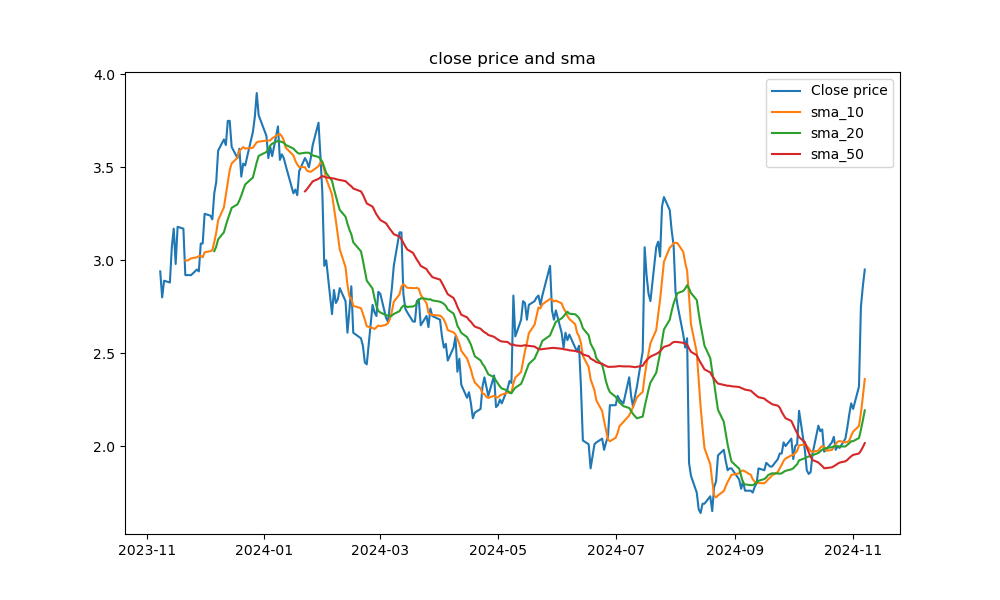

In [165]:
# display plots
display(HTML(data['plot'].iloc[1]))

### RSI

In [147]:
# Function to generate a RSI plot and return it as a base64-encoded HTML image
def plot_rsi(date, data, rsi):
    
    # Create a figure and subplots
    fig = plt.figure(figsize=(10, 6))
    ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
    ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
    
    # Close price plot
    ax1.plot(date, data, label='Close price')
    ax1.set_title('Close price')
    ax1.legend()
    
    # RSI plot
    ax2.plot(date, rsi, color='orange', linewidth=1, label='RSI')
    ax2.set_title('Relative Strength Index (RSI)')
    # Set the oversold threshold at 30 and overbought threshold at 70
    ax2.axhline(30, linestyle='--', linewidth=1.5, color='green', label='Oversold')
    ax2.axhline(70, linestyle='--', linewidth=1.5, color='red', label='Overbought')
    ax2.legend()
    
    buf = BytesIO()
    plt.savefig(buf, format="png")
    plt.close(fig)
    buf.seek(0)
    
    # Encode the image in base64
    img_base64 = base64.b64encode(buf.getvalue()).decode('utf-8')
    
    # Create an HTML image tag
    return f'<img src="data:image/png;base64,{img_base64}" />'

In [149]:
def rsi_calc(date, data):
    diff = data.pct_change()
    diff[0] = 0

    change_up = diff.copy()
    change_down = diff.copy()

    change_up[change_up<0] = 0
    change_down[change_down>0] = 0

    avg_up = change_up.rolling(14).mean()
    avg_down = change_down.rolling(14).mean().abs()

    rsi = 100 - (100/(1+avg_up/avg_down))
    image = plot_rsi(date, data, rsi)
    
    return rsi, image

In [151]:
# historical rsi plot
rsi_image = []
# current rsi
last_rsi = []

for ticker in data.ticker:
    
    if pd.isna(ticker):
        rsi_image.append(None)
        last_rsi.append(None)
        continue
        
    else:
        # Get historical data
        comp = yf.Ticker(ticker)
        comp_data = comp.history(period="1y")
        
        if comp_data.empty and len(comp_data.Close) < 200:
            rsi_image.append(None)
            last_rsi.append(None)
            continue
            
        else:
            rsi, image = rsi_calc(comp_data.index, comp_data.Close)
            rsi_image.append(image)
            last_rsi.append(rsi[-1])

VNP: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3737382264.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  diff[0] = 0
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3488428428.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_rsi.append(rsi[-1])
/Users/anthony_ning/opt/anaconda3/li

AKT.A: No data found, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3737382264.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  diff[0] = 0
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3488428428.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_rsi.append(rsi[-1])
/Users/anthony_ning/opt/anaconda3/li

BRK.A: No data found, symbol may be delisted
BRK.B: No data found, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3737382264.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  diff[0] = 0
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3488428428.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_rsi.append(rsi[-1])
/Users/anthony_ning/opt/anaconda3/li

CJT: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3737382264.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  diff[0] = 0
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3488428428.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_rsi.append(rsi[-1])
/Users/anthony_ning/opt/anaconda3/li

CVO: No data found for this date range, symbol may be delisted
CRD.B: No data found, symbol may be delisted
CRD.A: No data found, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3737382264.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  diff[0] = 0
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3488428428.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_rsi.append(rsi[-1])
/Users/anthony_ning/opt/anaconda3/li

DII.B: No data found, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3737382264.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  diff[0] = 0
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3488428428.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_rsi.append(rsi[-1])
/Users/anthony_ning/opt/anaconda3/li

MPCT.U: No data found, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3737382264.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  diff[0] = 0
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3488428428.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_rsi.append(rsi[-1])
/Users/anthony_ning/opt/anaconda3/li

MKP: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3737382264.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  diff[0] = 0
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3488428428.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_rsi.append(rsi[-1])
/Users/anthony_ning/opt/anaconda3/li

ONC: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3737382264.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  diff[0] = 0
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3488428428.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_rsi.append(rsi[-1])
/Users/anthony_ning/opt/anaconda3/li

POU: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3737382264.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  diff[0] = 0
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3488428428.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_rsi.append(rsi[-1])
/Users/anthony_ning/opt/anaconda3/li

TIH: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3737382264.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  diff[0] = 0
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3488428428.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_rsi.append(rsi[-1])
/Users/anthony_ning/opt/anaconda3/li

WJX: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3737382264.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  diff[0] = 0
/var/folders/60/75vh_thj2m57nynzg5tgw0300000gn/T/ipykernel_66379/3488428428.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_rsi.append(rsi[-1])
/Users/anthony_ning/opt/anaconda3/li

In [153]:
data['history RSI'] = rsi_image
data['current RSI'] = last_rsi
data

,Company,Period Ending,Consensus EPS,Year Ago Actual EPS,ticker,ten day return,one month return,one year return,trend,current price,plot,history RSI,current RSI
0,5N Plus Inc (VNP),Q3 9/1/24,0.06,0.02,VNP,NaN,NaN,NaN,None,None,None,None,NaN
1,8X8 Inc (EGHT),Q2 9/1/24,0.08,0.14,EGHT,0.131707,0.183673,-0.226667,above,above,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",89.872853
2,Abb India LTD (),Q4 9/1/24,23.31,15.98,NaN,NaN,NaN,NaN,None,None,None,None,NaN
3,Abcellera Biologics Inc (ABCL),Q3 9/1/24,-0.15,-0.10,ABCL,0.017606,0.146825,-0.354190,below,below,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",43.179151
4,Ac Immune Sa (ACIU),Q3 9/1/24,-0.20,-0.18,ACIU,-0.054662,-0.209677,0.092937,above,above,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",55.564301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,Wynn Resorts LTD (WYNN),Q3 9/1/24,1.01,0.99,WYNN,-0.037726,0.136526,0.016619,below,below,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",22.742525
297,York Water Co (YORW),Q3 9/1/24,0.41,0.53,YORW,-0.047568,-0.061689,-0.048405,above,above,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",46.153007
298,Yum China Holdings Inc (YUMC),Q3 9/1/24,0.68,0.59,YUMC,0.107520,0.239672,0.091550,above,above,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",85.722479
299,Zentalis Pharmaceuticals Inc (ZNTL),Q3 9/1/24,-0.91,-0.79,ZNTL,0.195513,-0.072139,-0.701122,above,above,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",67.580051



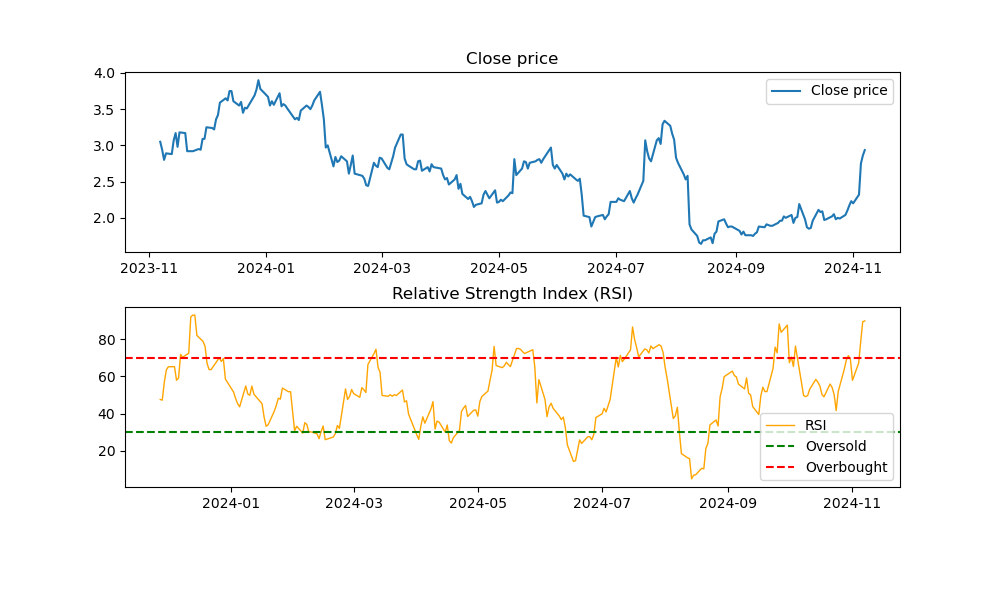

In [155]:
# display plots
display(HTML(data['history RSI'].iloc[1]))

### MACD

In [174]:
def plot_macd(date, price, macd, signal):
    
    # Create a figure and subplots
    fig = plt.figure(figsize=(10, 6))
    ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
    ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
    
    # Close price plot
    ax1.plot(date, price, label='Close price')
    ax1.set_title('Close price')
    ax1.legend()
    
    # MACD plot
    ax2.plot(date, macd, color='blue', label='MACD')
    # Signal line
    ax2.plot(date, signal, color='orange', label='MACD Signal Line')
    ax2.set_title('MACD and signal line')
    ax2.legend()
    
    buf = BytesIO()
    plt.savefig(buf, format="png")
    plt.close(fig)
    buf.seek(0)
    
    # Encode the image in base64
    img_base64 = base64.b64encode(buf.getvalue()).decode('utf-8')
    
    # Create an HTML image tag
    return f'<img src="data:image/png;base64,{img_base64}" />'

In [176]:
macd_image = []

for ticker in data.ticker:
    
    if pd.isna(ticker):
        macd_image.append(None)
        continue

    else:
        
        # Get historical data
        comp = yf.Ticker(ticker)
        comp_data = comp.history(period="1y")
        
        if comp_data.empty and len(comp_data.Close) < 200:
            macd_image.append(None)
            continue
            
        else:

            # Source: https://medium.com/@financial_python/building-a-macd-indicator-in-python-190b2a4c1777
            
            # Calculate the 12-period EMA
            comp_data['EMA12'] = comp_data['Close'].ewm(span=12, adjust=False).mean()
            # Calculate the 26-period EMA
            comp_data['EMA26'] = comp_data['Close'].ewm(span=26, adjust=False).mean()
            
            # Calculate MACD (the difference between 12-period EMA and 26-period EMA)
            comp_data['MACD'] = comp_data['EMA12'] - comp_data['EMA26']
            
            # Calculate the 9-period EMA of MACD (Signal Line)
            comp_data['Signal_Line'] = comp_data['MACD'].ewm(span=9, adjust=False).mean()

            image = plot_macd(comp_data.index, comp_data.Close, comp_data.MACD, comp_data.Signal_Line)
            macd_image.append(image)

VNP: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIn

AKT.A: No data found, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIn

BRK.A: No data found, symbol may be delisted
BRK.B: No data found, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIn

CJT: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIn

CVO: No data found for this date range, symbol may be delisted
CRD.B: No data found, symbol may be delisted
CRD.A: No data found, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIn

DII.B: No data found, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


MPCT.U: No data found, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIn

MKP: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIn

ONC: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIn

POU: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIn

TIH: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIn

WJX: No data found for this date range, symbol may be delisted


/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/anthony_ning/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIn

In [178]:
data['MACD plot'] = macd_image
data

,Company,Period Ending,Consensus EPS,Year Ago Actual EPS,ticker,ten day return,one month return,one year return,trend,current price,plot,history RSI,current RSI,MACD plot
0,5N Plus Inc (VNP),Q3 9/1/24,0.06,0.02,VNP,NaN,NaN,NaN,None,None,None,None,NaN,None
1,8X8 Inc (EGHT),Q2 9/1/24,0.08,0.14,EGHT,0.131707,0.183673,-0.226667,above,above,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",89.872853,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
2,Abb India LTD (),Q4 9/1/24,23.31,15.98,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None
3,Abcellera Biologics Inc (ABCL),Q3 9/1/24,-0.15,-0.10,ABCL,0.017606,0.146825,-0.354190,below,below,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",43.179151,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
4,Ac Immune Sa (ACIU),Q3 9/1/24,-0.20,-0.18,ACIU,-0.054662,-0.209677,0.092937,above,above,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",55.564301,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,Wynn Resorts LTD (WYNN),Q3 9/1/24,1.01,0.99,WYNN,-0.037726,0.136526,0.016619,below,below,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",22.742525,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
297,York Water Co (YORW),Q3 9/1/24,0.41,0.53,YORW,-0.047568,-0.061689,-0.048405,above,above,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",46.153007,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
298,Yum China Holdings Inc (YUMC),Q3 9/1/24,0.68,0.59,YUMC,0.107520,0.239672,0.091550,above,above,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",85.722479,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
299,Zentalis Pharmaceuticals Inc (ZNTL),Q3 9/1/24,-0.91,-0.79,ZNTL,0.195513,-0.072139,-0.701122,None,None,None,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",67.580051,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."



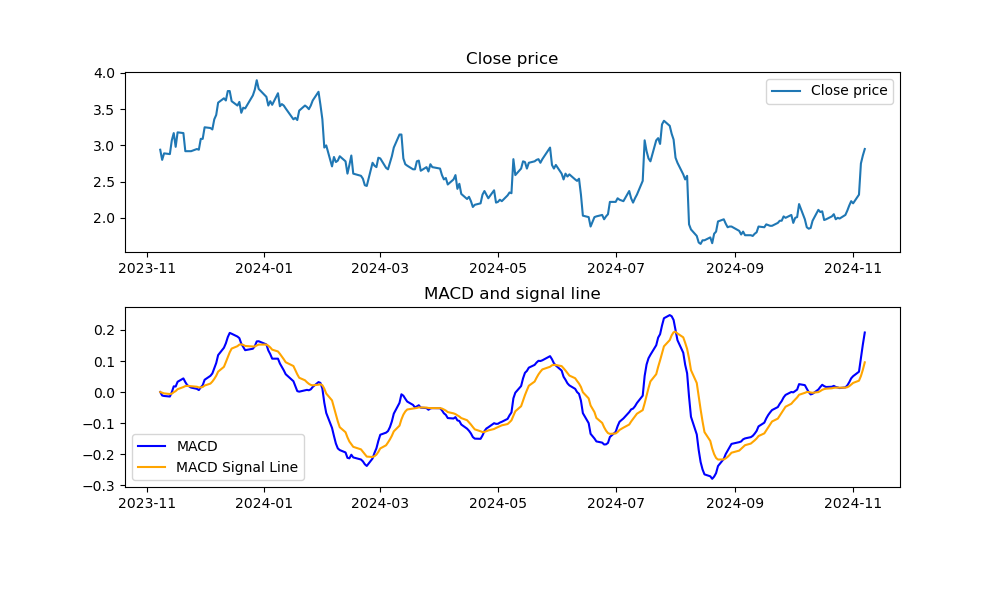

In [180]:
# display plots
display(HTML(data['MACD plot'].iloc[1]))